<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Regression with nural network

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


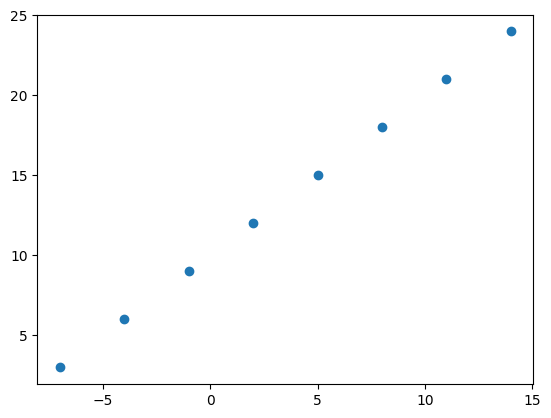

In [2]:
## Create data to view and fit
import numpy as np
import matplotlib.pyplot as plt
# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

In [3]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
hous_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
hous_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensor
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
X.shape

TensorShape([8])

In [12]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

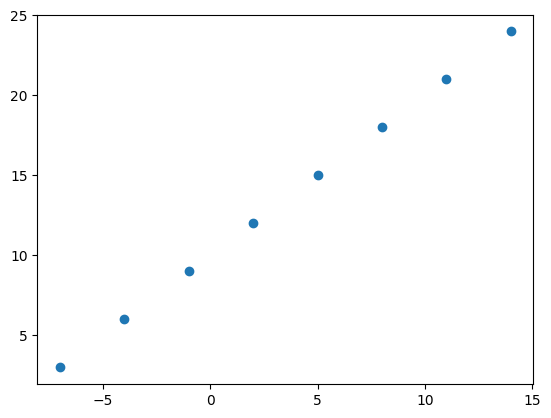

In [13]:
plt.scatter(X,y)

## Steps in modeling with tensor
1. **Create a model** - define inout and output layers , as well as the hidden layers of a deep learning model
2. **compiling a model** - define the loss function / optimizer / evaluation
3. **Fitting a model**

In [14]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics=["mae"]
              )


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.8592 - mae: 10.8592
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 10.7268 - mae: 10.7268
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 10.5942 - mae: 10.5942
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 10.4617 - mae: 10.4617
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.3292 - mae: 10.3292


In [15]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make aprediction using our model
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[15.851503]], dtype=float32)

In [17]:
y_pred+16

array([[31.851503]], dtype=float32)

### Improving our model


In [18]:
# Let's rebuild our model
# 1. create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.compie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3. fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.0607 - mae: 11.0607
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.9282 - mae: 10.9282
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 10.7957 - mae: 10.7957
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 10.6632 - mae: 10.6632
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 10.5307 - mae: 10.5307
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.3982 - mae: 10.3982
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 10.2657 - mae: 10.2657
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 10.1332 - mae: 10.1332
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 10.0007 - mae: 10.0007
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.8682 - mae: 9.8682
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.7357 - mae: 9.7357
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 9.6032 - mae: 9.6032
Epoch 13/100
1/1 ━━━━━━━━━

In [19]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Try and make aprediction using our model
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[29.925615]], dtype=float32)

In [21]:
# Let's improve the model
# 1. create the model (with extra hidden layer with 100 hidden units)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - loss: 14.7354 - mae: 14.7354
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 14.0245 - mae: 14.0245
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 13.3224 - mae: 13.3224
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.6272 - mae: 12.6272
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.9365 - mae: 11.9365
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 11.2477 - mae: 11.2477
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.5581 - mae: 10.5581
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 9.8648 - mae: 9.8648
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 9.1646 - mae: 9.1646
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 8.4540 - mae: 8.4540
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.7293 - mae: 7.7293
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6.9867 - mae: 6.9867
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [22]:
y_pred=model.predict(tf.expand_dims(17.0, axis=-1),)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[25.973166]], dtype=float32)

## Evaluating a model

In [293]:
x=tf.range(-100,100,4)

In [23]:
X=tf.expand_dims(tf.range(-100,100,4),axis=-1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [294]:
# Make a labels for the data set
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

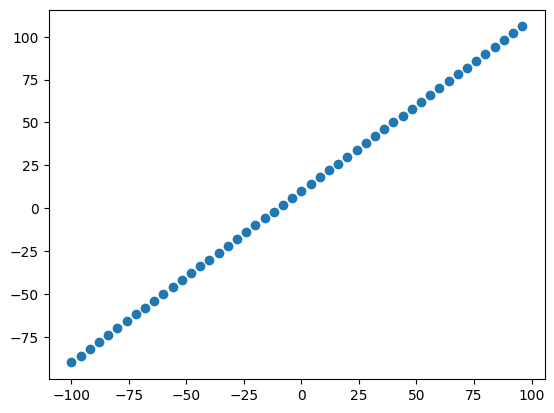

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### the 3 sets
1. **train**
2. **valid**
3. **test**


In [26]:
# check the length
len(X)

50

In [27]:
# Split the data into train and test dataset
X_train= X[:40]# first 40 training samples(80% of the data)
y_train=y[:40]
X_test= X[40:] # last 10 are testing samples (20% of the data)
y_test= y[40:]
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

 ## Visualizing the data


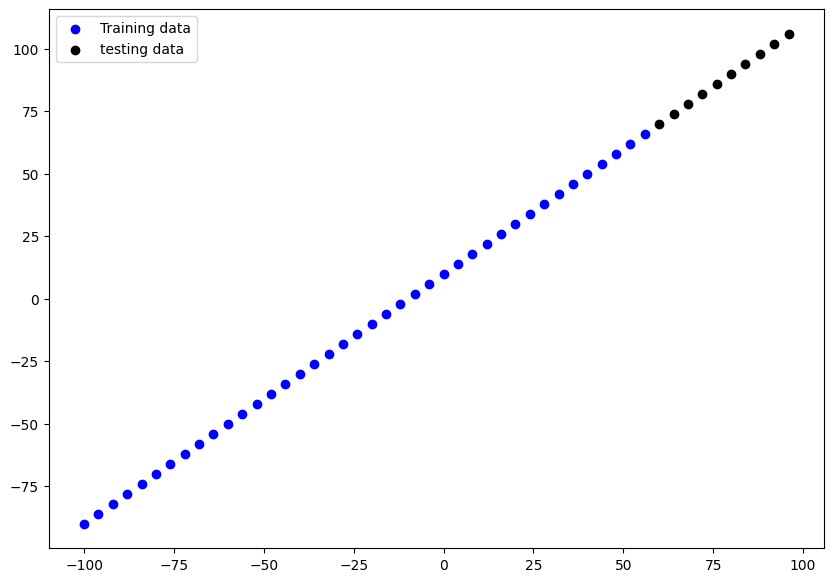

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="k",label="testing data")
plt.legend();

In [29]:
## Lat's have a look for how build nn

#1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2985 - mae: 9.2985 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3350 - mae: 8.3350 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0377 - mae: 9.0377 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0334 - mae: 8.0334 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7314 - mae: 9.7314 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0155 - mae: 8.0155 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7198 - mae: 9.7198 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9977 - mae: 7.9977 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7082 - mae: 9.7082 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9798 - mae: 7.9798 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6966 - mae: 9.6966 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9620 - mae: 7.9620 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/st

### visualizing the model

In [30]:
# model .build()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
X[0],y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-100], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([-90], dtype=int32)>)

In [42]:
# from keras import models
# from keras import layers
# # Create a model witch builds automatically by defining the input_shape
# tf.random.set_seed(42)
# # 1. Create a model
# model = models.Sequential([])
# # model.add(layers.Dense(1,input_shape=[1,1]))
# model.add(layers.Dense(1,input_shape=[1,1]))

# # 2. compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mea"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [242]:
from os import name
# Create a model witch builds automatically by defining the input_shape
# tf.random.set_seed(42)

#1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1,1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model")
# compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

In [243]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 10)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [244]:
# Let's fit our model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 55.7395 - mae: 55.7395 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.7341 - mae: 41.7341 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.0520 - mae: 28.0520 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8470 - mae: 14.8470 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2211 - mae: 8.2211 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9885 - mae: 7.9885 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6663 - mae: 7.6663 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7732 - mae: 7.7732 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2947 - mae: 8.2947 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2528 - mae: 8.2528 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2108 - mae: 8.2108 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1249 - mae: 8.1249 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [245]:
# Get a summaer of our model
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1, 10)               │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

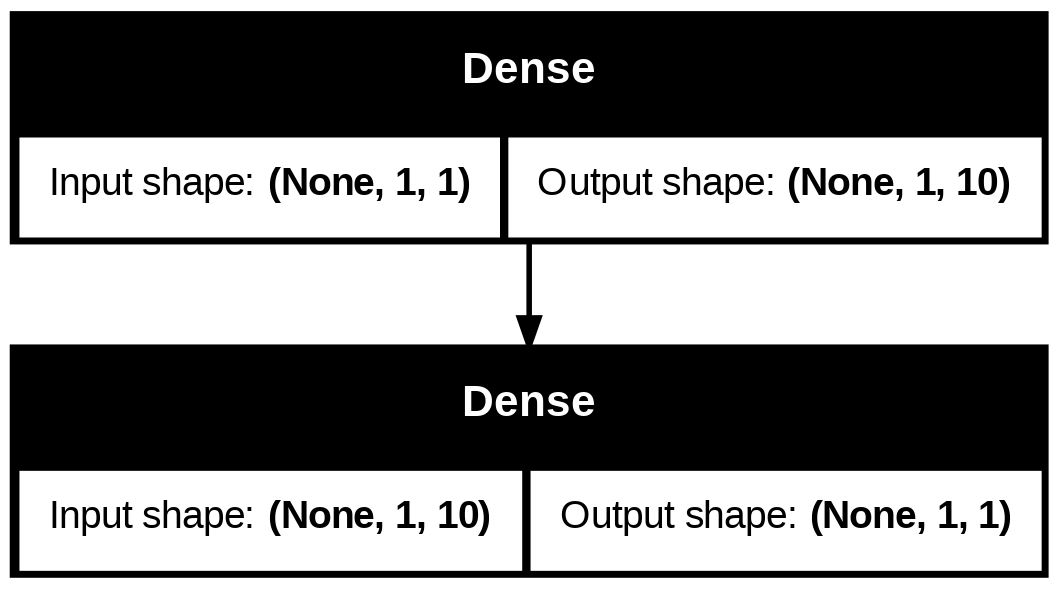

In [246]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's prediction

In [247]:
# Make some predictions
y_pred =model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[[50.46912 ]],

       [[53.80953 ]],

       [[57.149914]],

       [[60.490303]],

       [[63.83069 ]],

       [[67.17109 ]],

       [[70.51145 ]],

       [[73.85186 ]],

       [[77.192245]],

       [[80.53263 ]]], dtype=float32)

In [248]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [249]:
# Let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=y_pred):
  """
  plots training data , test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot testing data into green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # PLot model's predictions in red
  plt.scatter(test_data,prediction,c="r",label="Predictions")
  #show the legend
  plt.legend();

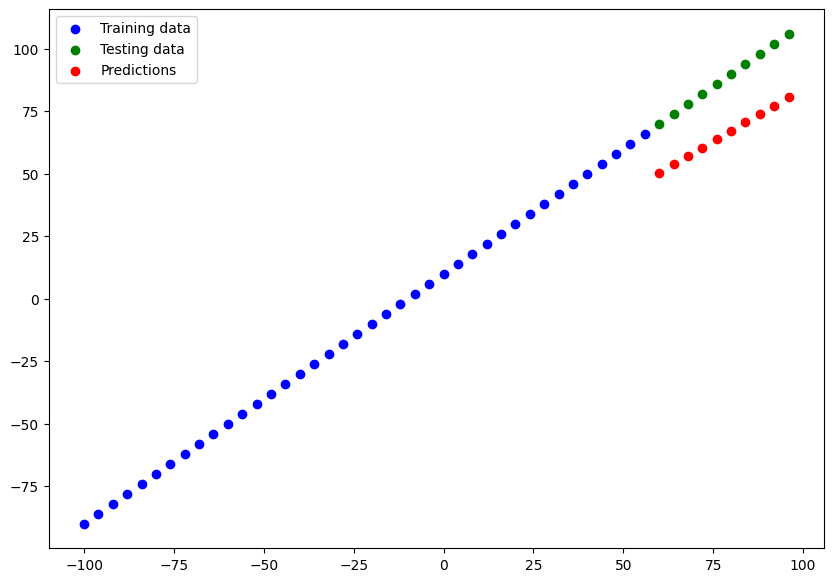

In [250]:
plot_prediction()

### Evaliatino our models's predictions with regression evaluation metrics

In [251]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 22.4991 - mae: 22.4991


[22.499114990234375, 22.499114990234375]

In [258]:
y_pred

array([[[50.46912 ]],

       [[53.80953 ]],

       [[57.149914]],

       [[60.490303]],

       [[63.83069 ]],

       [[67.17109 ]],

       [[70.51145 ]],

       [[73.85186 ]],

       [[77.192245]],

       [[80.53263 ]]], dtype=float32)

In [255]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [273]:
# Calculate the mean absolut error
tf.keras.losses.MAE(
    y_test, y_pred
)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.53088 , 20.190472, 20.850086, 21.509697, 22.169312, 22.82891 ,
       23.488548, 24.14814 , 24.807755, 25.46737 ], dtype=float32)>

In [274]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([50.46912 , 53.80953 , 57.149914, 60.490303, 63.83069 , 67.17109 ,
       70.51145 , 73.85186 , 77.192245, 80.53263 ], dtype=float32)>

In [275]:
y_pred.shape

(10, 1, 1)

In [278]:
mae=tf.keras.losses.MAE(
    y_true=y_test,y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.53088 , 20.190472, 20.850086, 21.509697, 22.169312, 22.82891 ,
       23.488548, 24.14814 , 24.807755, 25.46737 ], dtype=float32)>

### Calculate the mean square error

In [280]:
tf.keras.losses.MSE(
    y_true=y_test,y_pred=tf.squeeze(y_pred)
)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([381.45526, 407.65515, 434.7261 , 462.66705, 491.47836, 521.1592 ,
       551.7119 , 583.1327 , 615.4247 , 648.5869 ], dtype=float32)>

In [283]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.keras.losses.MAE(y_true=y_true,
                             y_pred=y_pred)

def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_true,y_pred=y_pred)

## Running experiments to improve our model

In [285]:
X_train , y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70],
        [-66],
        [-62],
        [-58],
        [-54],
        [-50],
        [-46],
        [-42],
        [-38],
        [-34],
        [-30],
        

In [287]:
tf.random.set_seed(42)
#1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])
#2.compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. fit
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 78.0618 - mae: 78.0618 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 42.9870 - mae: 42.9870
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7079 - mae: 11.7079  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8574 - mae: 7.8574 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8128 - mae: 10.8128 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6631 - mae: 7.6631 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9834 - mae: 11.9834
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.1702 - mae: 8.1702
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7140 - mae: 8.7140 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5807 - mae: 8.5807 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3484 - mae: 8.3484 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0919 - mae: 9.0919 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


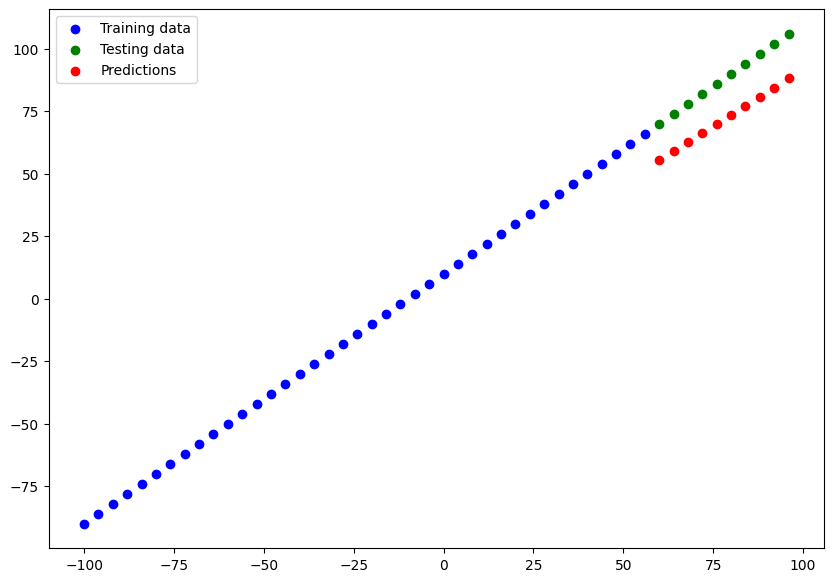

In [290]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_prediction(prediction=y_preds_1)

In [292]:
# Calcaulate model_1 evaluation
mae_1=mae(y_test,tf.squeeze(y_preds_1))
mse_1=mse(y_test,tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([14.405605, 14.791603, 15.177601, 15.563599, 15.9496  , 16.335594,
        16.721596, 17.107597, 17.493591, 17.879593], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([207.52147, 218.79152, 230.35957, 242.2256 , 254.38974, 266.85162,
        279.61176, 292.6699 , 306.02573, 319.67984], dtype=float32)>)